In [1]:
import pandas as pd
import random
import numpy as np
from scipy import stats
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


random.seed(42)
np.random.seed(42)

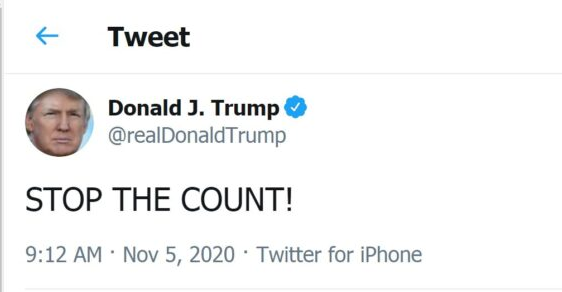

In [2]:
days = 10

mu_control, sigma_control, n_control          = 100, 20, 100
mu_experiment, sigma_experiment, n_experiment = 100, 20, 100

In [3]:
def experiment_run(
    mu_control,
    sigma_control,
    n_control,
    mu_experiment,
    sigma_experiment,
    n_experiment,
    days,
    base_rs=2,
):

    current_date = 1
    user_data = pd.DataFrame()
    stat_result = pd.DataFrame()
    daily_data = pd.DataFrame()

    for day in range(days):

        np.random.seed(base_rs * 100 + day)
        daily_data_control = np.random.normal(mu_control, sigma_control, n_control)

        np.random.seed(base_rs * current_date - 1)
        daily_data_experiment = np.random.normal(
            mu_experiment, sigma_experiment, n_experiment
        )

        day_data_control = pd.DataFrame({"value": daily_data_control})
        day_data_control["date"] = current_date
        day_data_control["group"] = "control"

        day_data_experiment = pd.DataFrame({"value": daily_data_experiment})
        day_data_experiment["date"] = current_date
        day_data_experiment["group"] = "experiment"

        user_data = user_data.append(day_data_experiment).append(day_data_control)
        fit = stats.ttest_ind(
            user_data[user_data.group == "experiment"].value,
            user_data[user_data.group == "control"].value,
        )

        stat_result = stat_result.append(
            pd.DataFrame({"t": [fit[0]], "p": [fit[1]], "date": current_date})
        )

        current_data_stat = user_data.groupby(["group"], as_index=False).agg(
            {"value": "mean"}
        )
        current_data_stat["date"] = current_date

        daily_data = daily_data.append(current_data_stat)

        current_date += 1

    return daily_data, stat_result


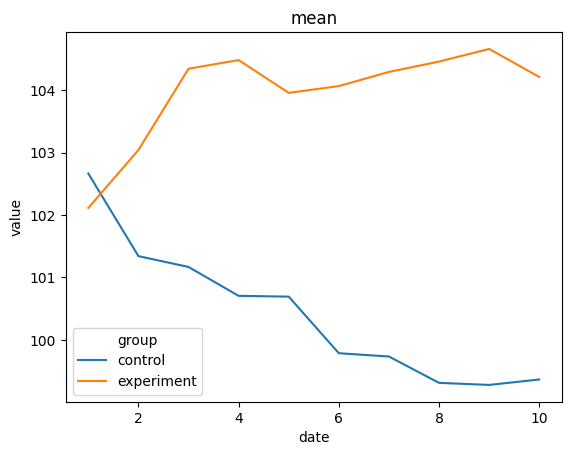

In [4]:
days = 10

mu_control, sigma_control, n_control          = 100, 20, 100
mu_experiment, sigma_experiment, n_experiment = 105, 20, 100


daily_data, stat_result = experiment_run(mu_control, sigma_control, n_control, mu_experiment, sigma_experiment, n_experiment, days, 13)

ax = sns.lineplot(data=daily_data, x="date", y="value", hue="group").set_title(
    "mean"
)

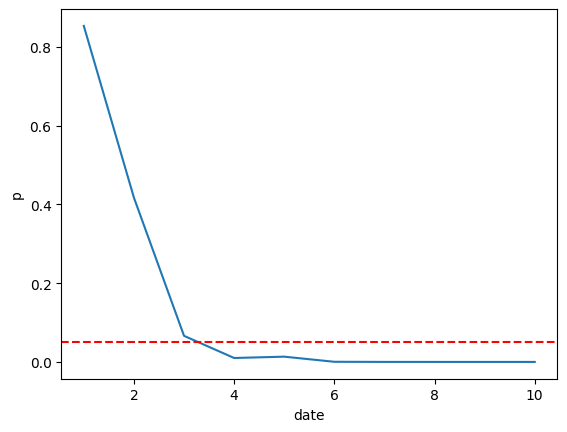

In [5]:
ax2 = sns.lineplot(data=stat_result, x="date", y="p")
ax2.axhline(0.05, ls='--', color='red')

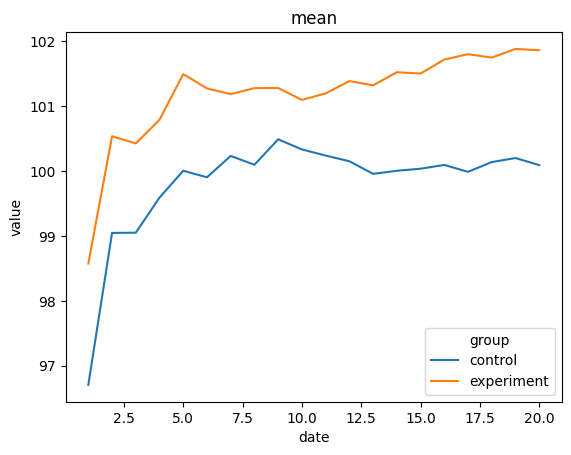

In [6]:
days = 20

mu_control, sigma_control, n_control          = 100, 20, 100
mu_experiment, sigma_experiment, n_experiment = 102, 20, 100


daily_data, stat_result = experiment_run(mu_control, sigma_control, n_control, mu_experiment, sigma_experiment, n_experiment, days, 15)

ax = sns.lineplot(data=daily_data, x="date", y="value", hue="group").set_title(
    "mean"
)

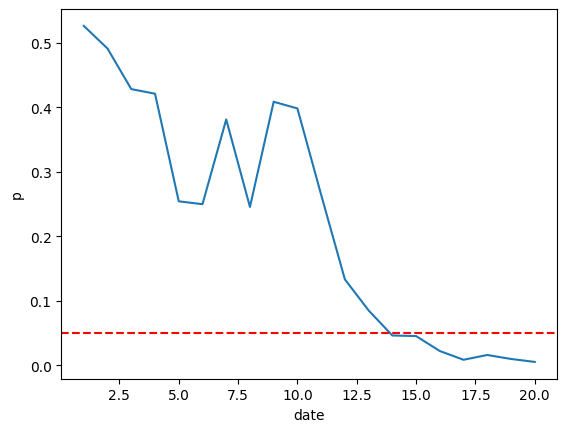

In [7]:
ax2 = sns.lineplot(data=stat_result, x="date", y="p")
ax2.axhline(0.05, ls='--', color='red')

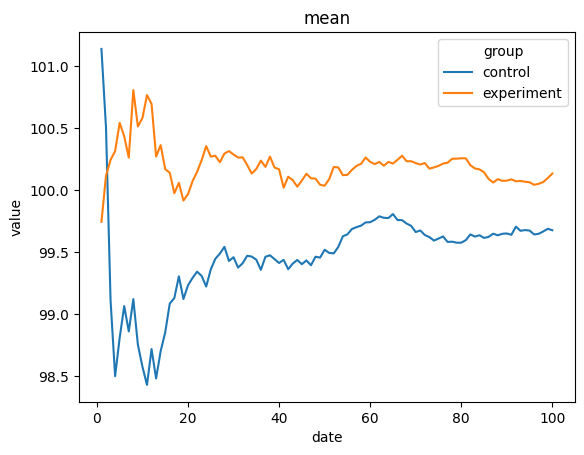

In [8]:
days = 100

mu_control, sigma_control, n_control          = 100, 20, 100
mu_experiment, sigma_experiment, n_experiment = 100, 20, 100


daily_data, stat_result = experiment_run(mu_control, sigma_control, n_control, mu_experiment, sigma_experiment, n_experiment, days, 10)

ax = sns.lineplot(data=daily_data, x="date", y="value", hue="group").set_title(
    "mean"
)

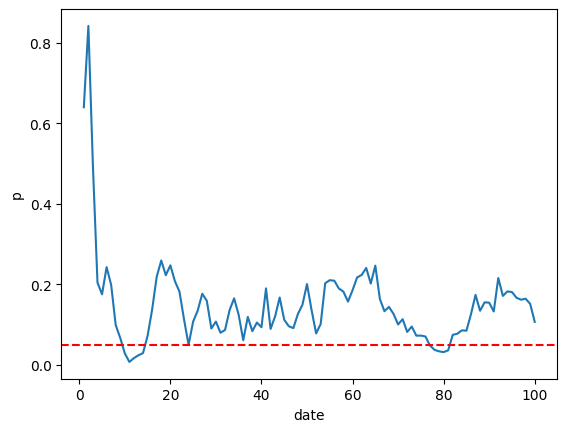

In [9]:
ax2 = sns.lineplot(data=stat_result, x="date", y="p")
ax2.axhline(0.05, ls='--', color='red')

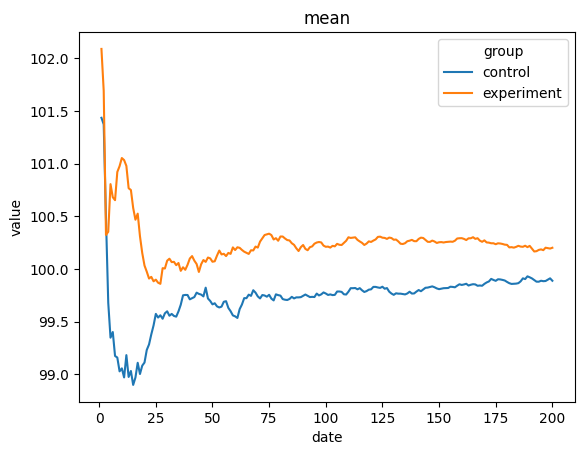

In [10]:
days = 200

mu_control, sigma_control, n_control          = 100, 20, 100
mu_experiment, sigma_experiment, n_experiment = 100, 20, 100


daily_data, stat_result = experiment_run(mu_control, sigma_control, n_control, mu_experiment, sigma_experiment, n_experiment, days, 22)

ax = sns.lineplot(data=daily_data, x="date", y="value", hue="group").set_title(
    "mean"
)

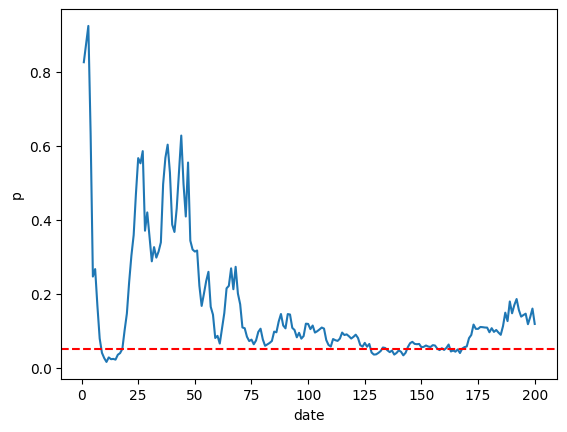

In [11]:
ax2 = sns.lineplot(data=stat_result, x="date", y="p")
ax2.axhline(0.05, ls='--', color='red')

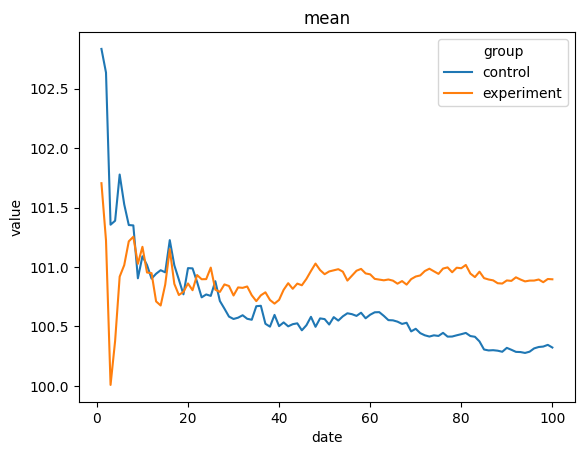

In [12]:
days = 100

mu_control, sigma_control, n_control          = 100, 20, 100
mu_experiment, sigma_experiment, n_experiment = 101, 20, 100


daily_data, stat_result = experiment_run(mu_control, sigma_control, n_control, mu_experiment, sigma_experiment, n_experiment, days, 5)

ax = sns.lineplot(data=daily_data, x="date", y="value", hue="group").set_title(
    "mean"
)

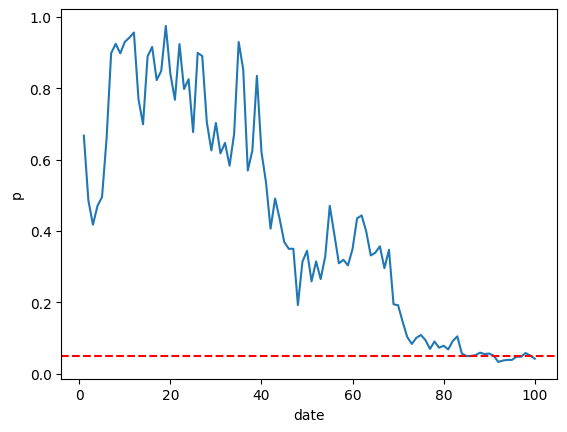

In [13]:
ax2 = sns.lineplot(data=stat_result, x="date", y="p")
ax2.axhline(0.05, ls='--', color='red')

In [14]:
days = 10000
p_values = []

mu_control, sigma_control, n_control          = 100, 20, 1000
mu_experiment, sigma_experiment, n_experiment = 100, 20, 1000


for day in range(days):

    daily_data_control = np.random.normal(mu_control, sigma_control, n_control)

    daily_data_experiment = np.random.normal(
        mu_experiment, sigma_experiment, n_experiment
    )

    p_values.append(stats.ttest_ind(daily_data_control, daily_data_experiment)[1])

<Axes: >

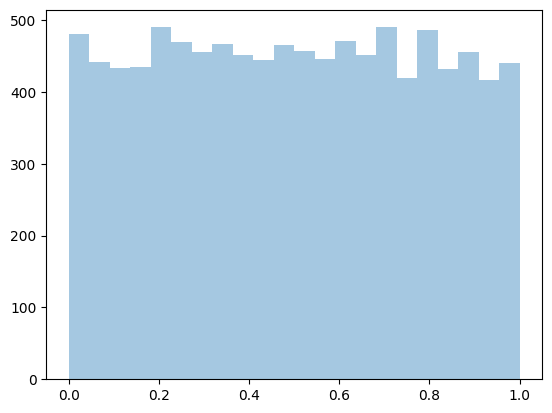

In [15]:
sns.distplot(p_values, kde=False)